# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?q={city}$appid={weather_api_key}'
url

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | meadow lakes
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | burao
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | chicxulub puerto
City not found. Skipping...
Processing Record 6 of Set 1 | riosucio
Processing Record 7 of Set 1 | barnstable
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | shillong
Processing Record 11 of Set 1 | north bend
Processing Record 12 of Set 1 | el abiodh sidi cheikh
Processing Record 13 of Set 1 | whitehorse
Processing Record 14 of Set 1 | peniche
Processing Record 15 of Set 1 | manfalut
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | hafnarfjordur
Processing Record 18 of Set 1 | lake monticello
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | pisco
Processing Record 21 of Set 1

Processing Record 36 of Set 4 | i-n-salah
Processing Record 37 of Set 4 | novyye lapsary
Processing Record 38 of Set 4 | karaisali
Processing Record 39 of Set 4 | vallo della lucania
Processing Record 40 of Set 4 | craig
Processing Record 41 of Set 4 | rabigh
Processing Record 42 of Set 4 | iskateley
Processing Record 43 of Set 4 | brooks
Processing Record 44 of Set 4 | howrah
Processing Record 45 of Set 4 | sao jose da coroa grande
Processing Record 46 of Set 4 | shalqar
Processing Record 47 of Set 4 | gisborne
Processing Record 48 of Set 4 | cabo san lucas
Processing Record 49 of Set 4 | palmer
Processing Record 0 of Set 5 | lebu
Processing Record 1 of Set 5 | enewetak
Processing Record 2 of Set 5 | cargados carajos
City not found. Skipping...
Processing Record 3 of Set 5 | ambovombe
Processing Record 4 of Set 5 | manggar
Processing Record 5 of Set 5 | baruun-urt
Processing Record 6 of Set 5 | sao francisco
Processing Record 7 of Set 5 | puerto armuelles
Processing Record 8 of Set 5 

Processing Record 27 of Set 8 | sinabang
Processing Record 28 of Set 8 | estevan
Processing Record 29 of Set 8 | tshabong
Processing Record 30 of Set 8 | talcahuano
Processing Record 31 of Set 8 | buta
Processing Record 32 of Set 8 | bridgewater
Processing Record 33 of Set 8 | alamogordo
Processing Record 34 of Set 8 | puerto plata
Processing Record 35 of Set 8 | tarauaca
Processing Record 36 of Set 8 | tura
Processing Record 37 of Set 8 | toga village
City not found. Skipping...
Processing Record 38 of Set 8 | isle of lewis
City not found. Skipping...
Processing Record 39 of Set 8 | port lincoln
Processing Record 40 of Set 8 | butembo
Processing Record 41 of Set 8 | princeville
Processing Record 42 of Set 8 | pedro carbo
Processing Record 43 of Set 8 | turkmenbasy
Processing Record 44 of Set 8 | chernyshevsk
Processing Record 45 of Set 8 | lompoc
Processing Record 46 of Set 8 | elmendorf air force base
City not found. Skipping...
Processing Record 47 of Set 8 | springfield
Processing 

Processing Record 17 of Set 12 | hasaki
Processing Record 18 of Set 12 | madison
Processing Record 19 of Set 12 | weligama
Processing Record 20 of Set 12 | praia
Processing Record 21 of Set 12 | al 'alamayn
City not found. Skipping...
Processing Record 22 of Set 12 | harrison
Processing Record 23 of Set 12 | hengchun
Processing Record 24 of Set 12 | verkhniy mamon
Processing Record 25 of Set 12 | wauchope
Processing Record 26 of Set 12 | mancio lima
Processing Record 27 of Set 12 | wynyard
Processing Record 28 of Set 12 | weno
Processing Record 29 of Set 12 | bonthe
Processing Record 30 of Set 12 | queenstown
Processing Record 31 of Set 12 | taulaga
Processing Record 32 of Set 12 | bikenibeu village
Processing Record 33 of Set 12 | hailey
Processing Record 34 of Set 12 | kiunga
Processing Record 35 of Set 12 | westport
Processing Record 36 of Set 12 | kabinda
Processing Record 37 of Set 12 | jinxiang
Processing Record 38 of Set 12 | tocopilla
Processing Record 39 of Set 12 | tadepalleg

In [14]:
city_weather

{'coord': {'lon': 150.4667, 'lat': -35.35},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 281.35,
  'feels_like': 278.9,
  'temp_min': 281.35,
  'temp_max': 281.35,
  'pressure': 1016,
  'humidity': 86,
  'sea_level': 1016,
  'grnd_level': 1012},
 'visibility': 10000,
 'wind': {'speed': 4.09, 'deg': 235, 'gust': 5.68},
 'rain': {'1h': 0.23},
 'clouds': {'all': 96},
 'dt': 1683403289,
 'sys': {'type': 2,
  'id': 2004986,
  'country': 'AU',
  'sunrise': 1683405555,
  'sunset': 1683443411},
 'timezone': 36000,
 'id': 2145554,
 'name': 'Ulladulla',
 'cod': 200}

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [15]:
# Display sample data
import os

output_dir = "output_data"
os.makedirs(output_dir, exist_ok=True)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,meadow lakes,61.6247,-149.6011,280.88,68,100,2.06,US,1683402908
1,edinburgh of the seven seas,-37.0676,-12.3116,288.81,73,100,6.65,SH,1683402909
2,burao,9.5221,45.5336,298.66,62,99,3.46,SO,1683402378
3,grytviken,-54.2811,-36.5092,277.45,87,100,6.70,GS,1683402911
4,riosucio,5.4216,-75.7032,297.32,64,98,0.81,CO,1683402896


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,meadow lakes,61.6247,-149.6011,280.88,68,100,2.06,US,1683402908
1,edinburgh of the seven seas,-37.0676,-12.3116,288.81,73,100,6.65,SH,1683402909
2,burao,9.5221,45.5336,298.66,62,99,3.46,SO,1683402378
3,grytviken,-54.2811,-36.5092,277.45,87,100,6.70,GS,1683402911
4,riosucio,5.4216,-75.7032,297.32,64,98,0.81,CO,1683402896


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

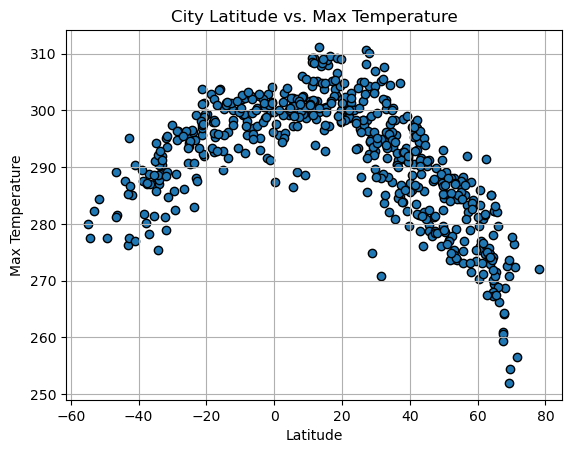

In [30]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

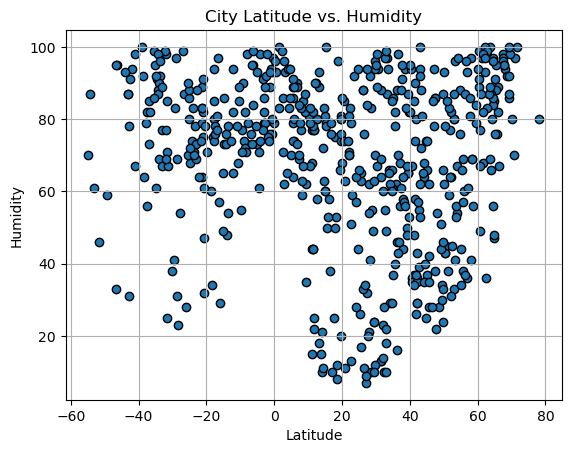

In [18]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

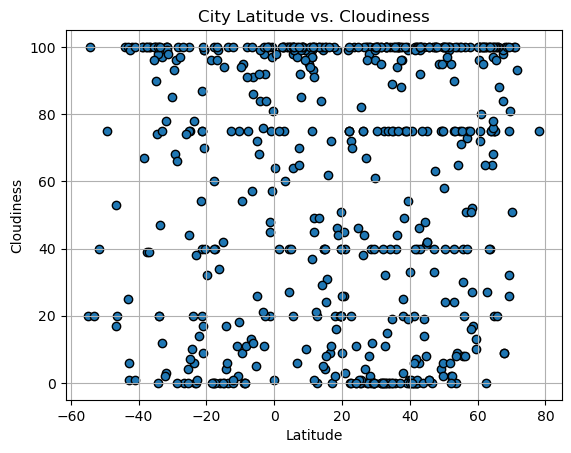

In [19]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

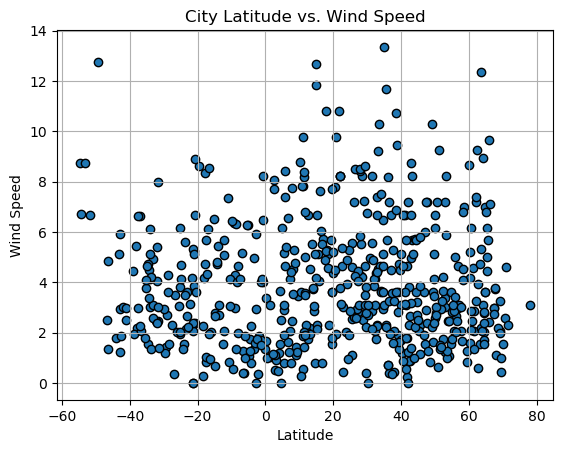

In [21]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [24]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates):
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Calculate regression line values
    regress_values = x_values * slope + intercept
    
    # Create scatter plot and regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    # Incorporate the other graph properties
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}", text_coordinates, fontsize=15, color="red")
    plt.grid(True)

In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,meadow lakes,61.6247,-149.6011,280.88,68,100,2.06,US,1683402908
2,burao,9.5221,45.5336,298.66,62,99,3.46,SO,1683402378
4,riosucio,5.4216,-75.7032,297.32,64,98,0.81,CO,1683402896
5,barnstable,41.7001,-70.2995,297.05,26,0,4.63,US,1683402913
8,shillong,25.5689,91.8831,288.27,63,0,1.12,IN,1683402915


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,edinburgh of the seven seas,-37.0676,-12.3116,288.81,73,100,6.65,SH,1683402909
3,grytviken,-54.2811,-36.5092,277.45,87,100,6.70,GS,1683402911
6,port-aux-francais,-49.3500,70.2167,277.57,59,75,12.77,TF,1683402914
7,ushuaia,-54.8000,-68.3000,279.96,70,20,8.75,AR,1683402915
17,blackmans bay,-43.0167,147.3167,276.33,87,25,2.92,AU,1683402926


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8212429077412143


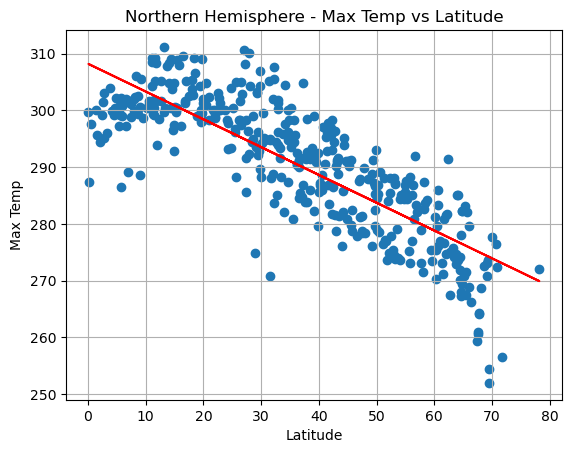

In [43]:
# Linear regression on Northern Hemisphere
# Define x and y values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function to plot the linear regression
plot_linear_regression(x_values, y_values, 
                       "Northern Hemisphere - Max Temp vs Latitude", 
                       "Latitude", "Max Temp",
                       (10,0))

plt.show()

The r-value is: 0.7763275634044188


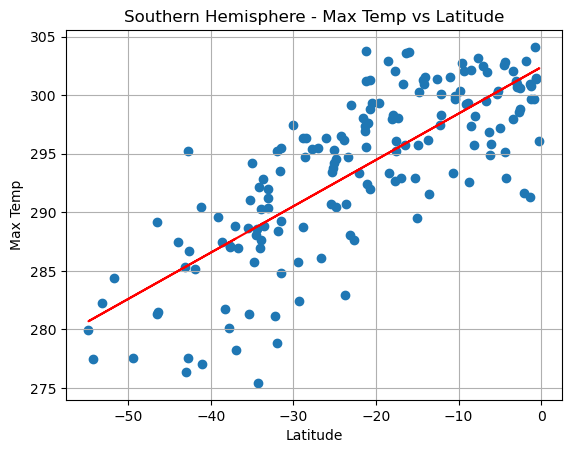

In [44]:
# Linear regression on Southern Hemisphere
# Define x and y values
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function to plot the linear regression
plot_linear_regression(x_values, y_values, 
                       "Southern Hemisphere - Max Temp vs Latitude", 
                       "Latitude", "Max Temp",
                       (-50,40))

plt.show()

**Discussion about the linear relationship:** There is a strong correlation between latitude and max temperature, with .77 for the Southern Hemisphere and -.82 for the Northern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1077719475659571


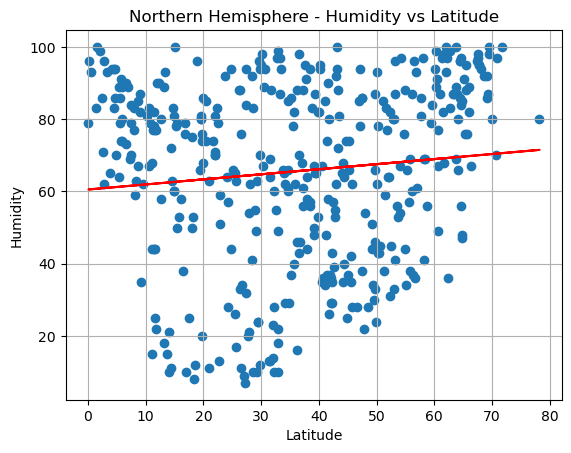

In [45]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function to plot the linear regression
plot_linear_regression(x_values, y_values, 
                       "Northern Hemisphere - Humidity vs Latitude", 
                       "Latitude", "Humidity",
                       (10,0))

plt.show()

The r-value is: 0.09656751759574052


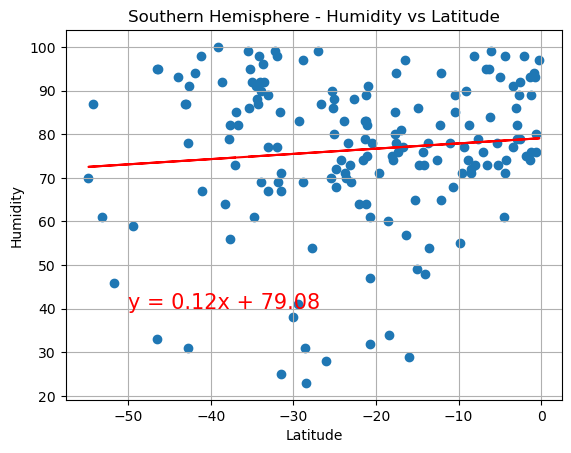

In [47]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function to plot the linear regression
plot_linear_regression(x_values, y_values, 
                       "Southern Hemisphere - Humidity vs Latitude", 
                       "Latitude", "Humidity",
                       (-50,40))

plt.show()

**Discussion about the linear relationship:** There is no strong correlation between latutide and humidity, with .10 for the Northern Hemisphere and .09 for the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.026077825799894257


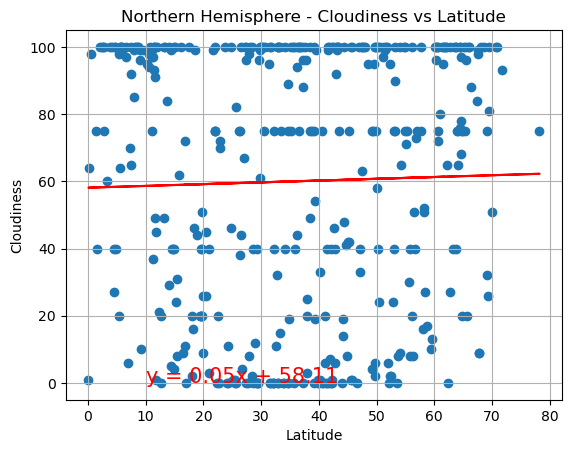

In [48]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function to plot the linear regression
plot_linear_regression(x_values, y_values, 
                       "Northern Hemisphere - Cloudiness vs Latitude", 
                       "Latitude", "Cloudiness",
                       (10,0))

plt.show()

The r-value is: -0.06005214896699223


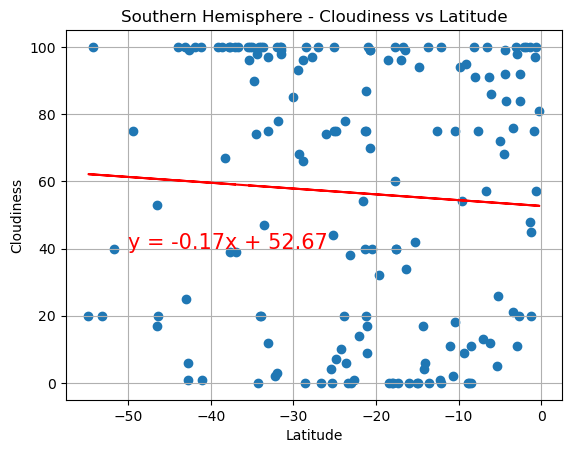

In [49]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function to plot the linear regression
plot_linear_regression(x_values, y_values, 
                       "Southern Hemisphere - Cloudiness vs Latitude", 
                       "Latitude", "Cloudiness",
                       (-50,40))

plt.show()

**Discussion about the linear relationship:** There is no strong correlation between latitude and cloudiness, with an r value of .02 for the Northern Hemisphere and -.06 for the Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.06828711200218661


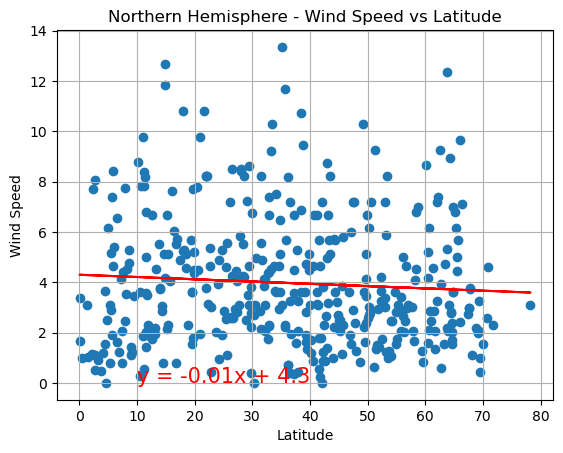

In [50]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function to plot the linear regression
plot_linear_regression(x_values, y_values, 
                       "Northern Hemisphere - Wind Speed vs Latitude", 
                       "Latitude", "Wind Speed",
                       (10,0))

plt.show()

The r-value is: -0.2039048741659913


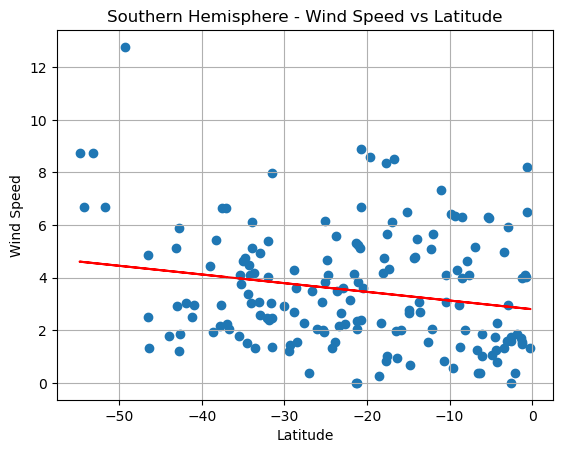

In [51]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function to plot the linear regression
plot_linear_regression(x_values, y_values, 
                       "Southern Hemisphere - Wind Speed vs Latitude", 
                       "Latitude", "Wind Speed",
                       (-50,40))

plt.show()

**Discussion about the linear relationship:** There is no strong correlation between latitude and wind speed, with an r value of -.06 for the Northern Hemisphere and -.2 for the Southern Hemisphere